# Half Adder Quantum Circuit (v1.0)

The following is a quantum implementation of the classical Half Adder circuit. The image below is the classical implementation of a Half Adder with a XOR and AND gate for Sum and Carry respectively.


In [7]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

### Defining the Circuit

In [14]:
quantReg = QuantumRegister(4)
classReg = ClassicalRegister(2)
circuit = QuantumCircuit(quantReg, classReg)

In [15]:
circuit.x(0) #Comment out this line to make A = 0
circuit.x(1) #Comment out this line to make B = 0
circuit.barrier()

The above line allows the user to test out the different varitions for the Half Adder. By default it is set to A = 1 and B = 1. If the user wants to change the gates they will have to run the simulator and the output again.

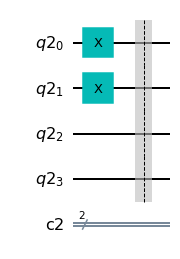

In [16]:
%matplotlib inline 
circuit.draw(output = 'mpl')

### Performing the Sum Operation

In the classical working of the Half Adder, the Sum is calculated by XORing A and B. In a quantum circuit, the Controlled NOT (or CNOT for short) gate performs this operation

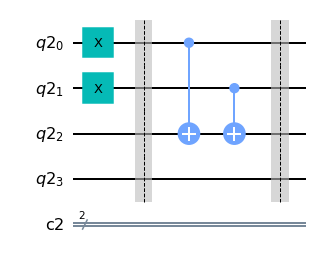

In [17]:
circuit.cx(0,2)
circuit.cx(1,2)
circuit.barrier()
circuit.draw(output = 'mpl')

A trivial point to note is that ```q_0 CX q_1 ~= q_0 XOR q_1```. The value of the XOR is stored in q_1. However, we don't want the value to be stored in q_1, we want seperate qubit to store it. So q_2 takes ```q_1 XOR (q_0 XOR q_2)```. Since the default value of q_2 is 0 therefore  q_1 XOR ```(q_0 XOR q_2) = q_1 XOR (q_0 XOR 0) = (q_1 XOR q_0) XOR 0```. This does not affect the XOR result since if ```(q_1 XOR q_0) = 0 then (q_1 XOR q_0) XOR 0 = 0``` and the same applies for the 1 case.

### Performing the Carry Operation

In the classical working of the Half Adder, the Carry is calculated by ANDing A and B. In a quantum circuit, the Toffoli CCNOT or CCX for short) gate performs this operation.

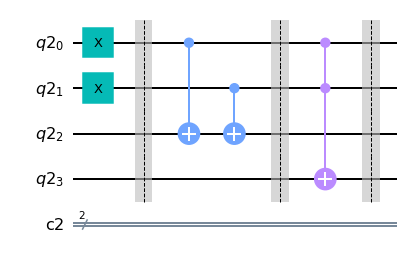

In [19]:
circuit.ccx(0,1,3)
circuit.barrier()
circuit.draw(output = 'mpl')

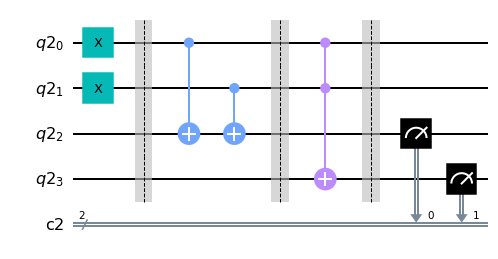

In [20]:
circuit.measure(2,0)
circuit.measure(3,1)
circuit.draw(output = 'mpl')

## Results

In [21]:
nativeSim = Aer.get_backend('qasm_simulator')
nativeResult = execute(circuit, backend = nativeSim).result()
counts = nativeResult.get_counts()

### Histogram Visualization 

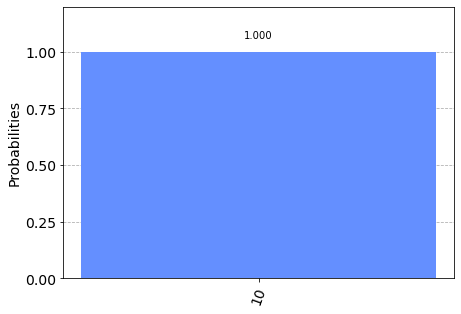

In [22]:
plot_histogram(counts)

Since q_0 and q_1 are both 1 therefore 1 + 1 = 10 (S = 0 and C = 1). We got the correct result. Yayy!

### Bloch Sphere Visualization

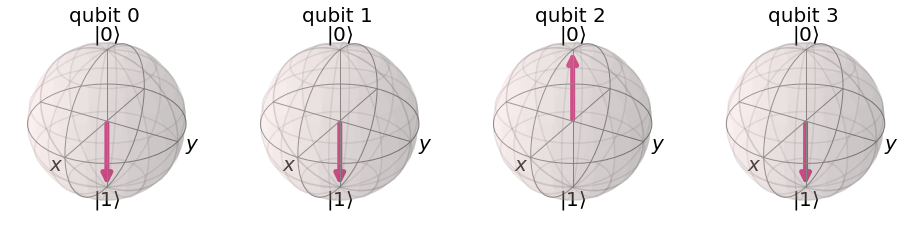

In [26]:
nativeSVSim = Aer.get_backend('statevector_simulator')
nativeSVResult = execute(circuit, backend = nativeSVSim).result()
stateVector = nativeSVResult.get_statevector()
plot_bloch_multivector(stateVector)

Quibits 2 and 3 are the Sum and the Carry respectively. Once again, the correct result but just in a different visual format.